### Bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msnum
import sweetviz as sv

# definindo formato dos números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# definindo tamanho dos gráficos
plt.rcParams['figure.figsize'] = [ 20, 10 ]

### Extração dos dados e visualizações gerais

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [4]:
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

<AxesSubplot:>

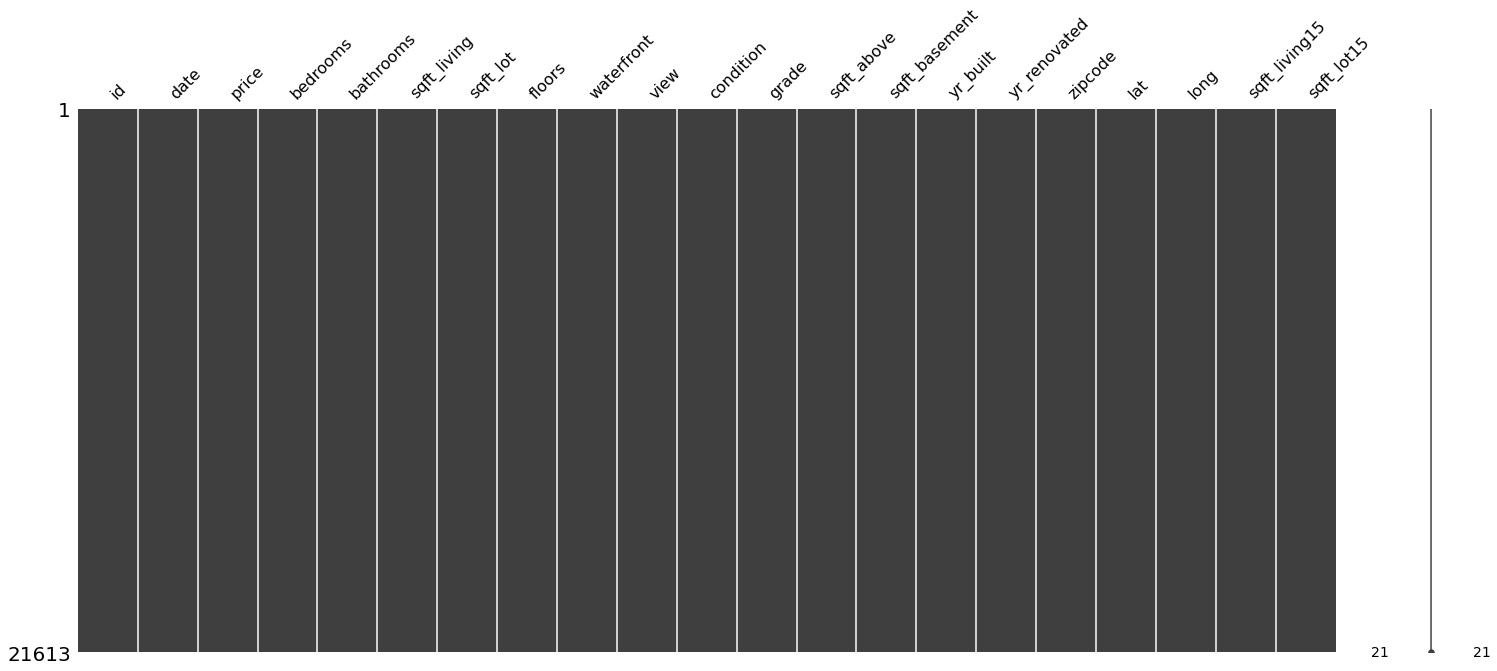

In [7]:
msnum.matrix(df)

### Transformação dos dados

In [3]:
#correção da tipagem dos dados
df['date'] = pd.to_datetime(df['date'])

#remoção de variáveis não utilizadas na solução 
df = df.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'])

In [10]:
#avaliando os parâmetros através de ferramenta low code
analyze_report = sv.analyze(df)

analyze_report.show_html(filepath='SWEETVIZ_REPORT.html', 
                         open_browser=True, 
                         layout='widescreen', 
                         scale=None)

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Análise descritiva

In [11]:
#análise descritiva
num_attributes = df.select_dtypes(include=['int64', 'float64'])

#medidas de dispersão e de tendência 
mean = num_attributes.mean() 
median = num_attributes.median()
st_deviation = num_attributes.std()
max_ = num_attributes.max()
min_ = num_attributes.min()

#unindo os dados
descriptive_metrics = pd.concat([mean, median, st_deviation, max_, min_], axis=1).reset_index()
descriptive_metrics.columns = ['atributos','media', 'mediana', 'desvio padrão', 'máximo', 'mínimo']
descriptive_metrics

,atributos,media,mediana,desvio padrão,máximo,mínimo
0,id,4580301520.86,3904930410.00,2876565571.31,9900000190.00,1000102.00
1,price,540088.14,450000.00,367127.20,7700000.00,75000.00
2,bedrooms,3.37,3.00,0.93,33.00,0.00
3,bathrooms,2.11,2.25,0.77,8.00,0.00
4,sqft_living,2079.90,1910.00,918.44,13540.00,290.00
5,sqft_lot,15106.97,7618.00,41420.51,1651359.00,520.00
6,floors,1.49,1.50,0.54,3.50,1.00
7,waterfront,0.01,0.00,0.09,1.00,0.00
8,view,0.23,0.00,0.77,4.00,0.00
9,condition,3.41,3.00,0.65,5.00,1.00


### Limpeza dos dados

In [4]:
#lidando com outliers 
'''
Nota-se que há uma casa com 33 quartos, entretanto, ao realizar algumas análises sobre o imóvel percebe-se que este pode ser 
um erro de digitação, tendo em vista que o seu preço e tamanho está dentro do esperado para imóveis com 3 quartos.
Dessa forma assumiu-se que 33 quartos é, na verdade, 3 quartos. 
'''

df_bedrooms = df[df['bedrooms'].isin([3, 33])]
df_bedrooms[['bedrooms', 'price', 'sqft_living', 'sqft_lot']].groupby('bedrooms').mean().reset_index()

df.loc[df['bedrooms']==33,'bedrooms'] = 3


## Insights

A hipótese é verdadeira. Imóveis que possuem vista para água são, em média, 212.64% mais caros que os demais.


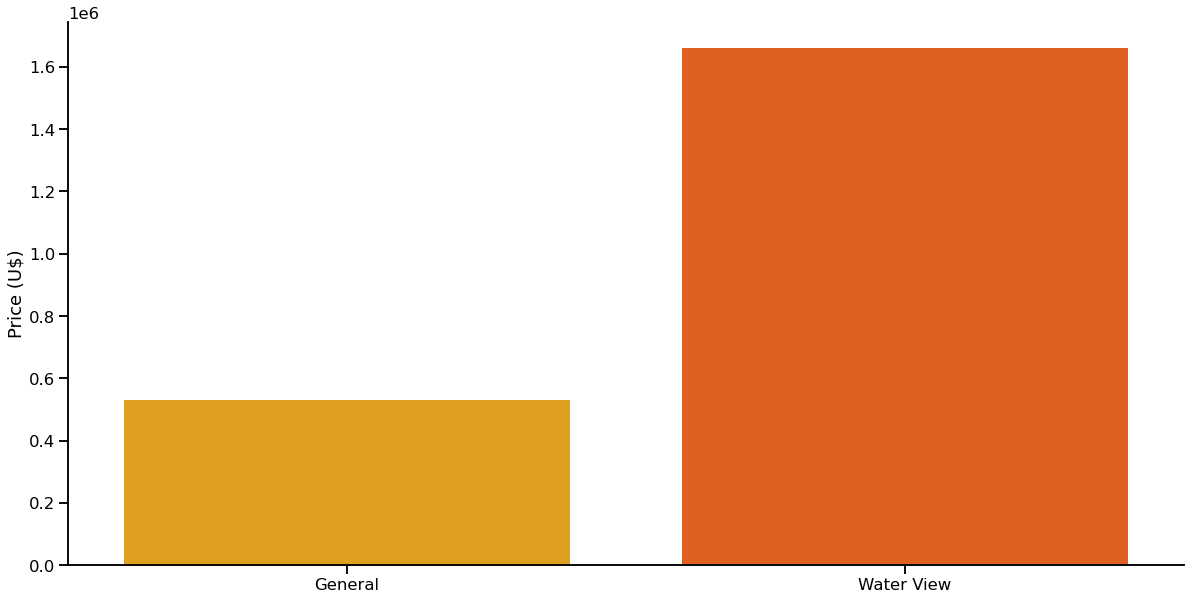

In [29]:
#h1: Imóveis que possuem vista para água, são 30% mais caros que os demais, na média. 
df_h1 = df[['waterfront','price']].groupby('waterfront').mean().reset_index()
df_h1['percentage'] = df_h1['price'].pct_change()*100

result = ''
if df_h1.loc[1, 'percentage'] > 30:
    result = 'verdadeira'
else: 'falsa'

print('A hipótese é {:}. Imóveis que possuem vista para água são, em média, {:.2f}% mais caros que os demais.'
      .format(result, df_h1.loc[1,'percentage']))

#plot
sn.set_context("talk")
h1 = sn.barplot(data=df_h1, x='waterfront', y='price', palette = 'autumn_r');
h1.set(ylabel = 'Price (U$)',
      xlabel= '',
      xticklabels=["General", "Water View"]);
sn.despine();

A hipótese é falsa. Imóveis construídos antes de 1955 são, em média, apenas 0.79% mais baratos que os demais.


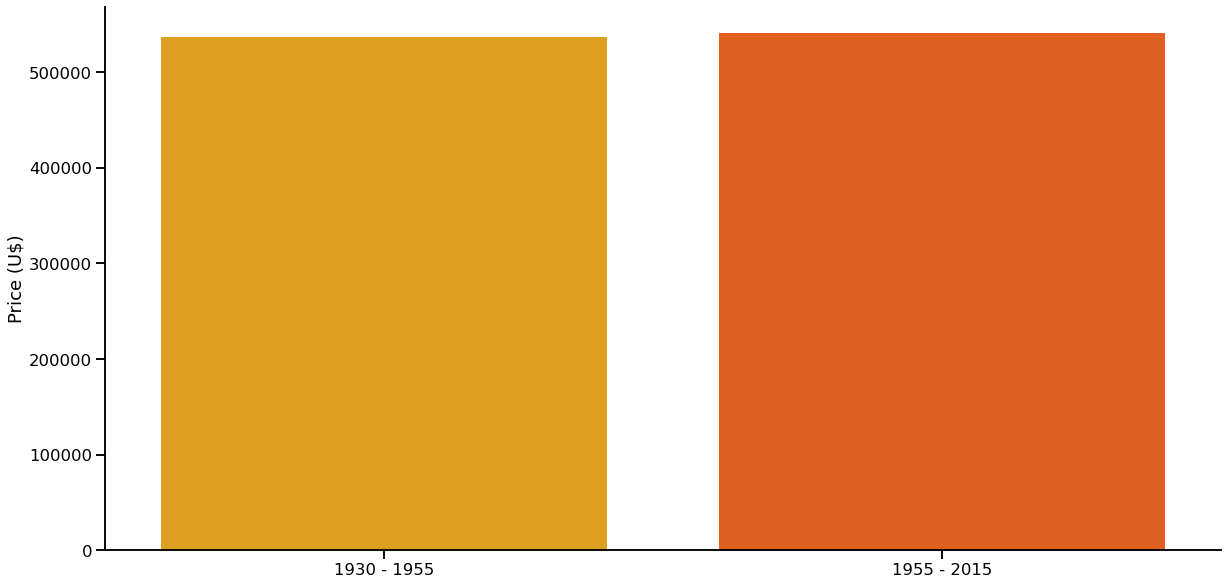

In [28]:
#h2: Imóveis construídos antes de 1955 são 50% mais baratos, na média. 

df['Ano_Construcao'] = df['yr_built'].apply(lambda x: "1930 - 1955" if x < 1955 else
                                                      "1955 - 2015") 
df_h2 = df[['Ano_Construcao', 'price']].groupby('Ano_Construcao').mean().reset_index()
df_h2['pct'] = df_h2['price'].pct_change()*100

result = ''
if df_h2.loc[1, 'pct'] > 50:
    result = 'verdadeira'
else: result = 'falsa'

print('A hipótese é {:}. Imóveis construídos antes de 1955 são, em média, apenas {:.2f}% mais baratos que os demais.'
      .format(result, df_h2.loc[1,'pct']))

#plot
sn.set_context("talk")
h2 = sn.barplot(data=df_h2, x='Ano_Construcao', y='price', palette = 'autumn_r');
h2.set(ylabel = 'Price (U$)',
      xlabel= '');
sn.despine();

A hipótese é falsa. Imóveis sem porão são, em média, 22.56% maiores que os demais.


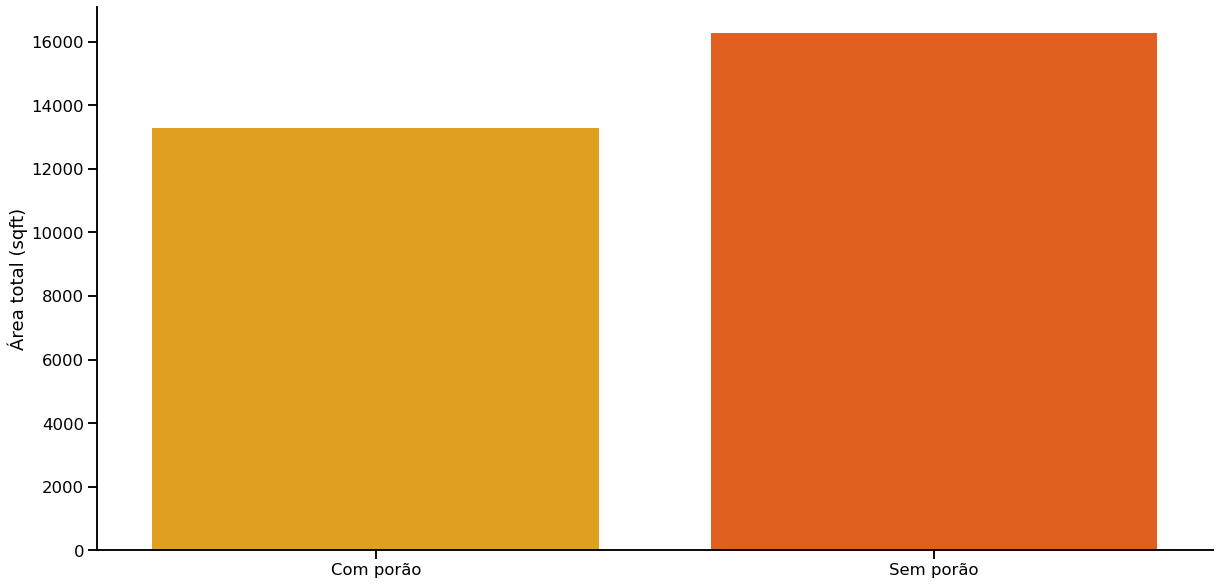

In [27]:
#h3: Imóveis sem porão possuem área total 40% maior que os imóveis com porão.

df['Porao'] = df['sqft_basement'].apply(lambda x: "Com porão" if x > 0 else
                                                  "Sem porão") 
df_h3 = df[['Porao', 'sqft_lot']].groupby('Porao').mean().reset_index()
df_h3['pct'] = df_h3['sqft_lot'].pct_change()*100

result = ''
if df_h3.loc[1, 'pct'] > 40:
    result = 'verdadeira'
else: result = 'falsa'

print('A hipótese é {:}. Imóveis sem porão são, em média, {:.2f}% maiores que os demais.'
      .format(result, df_h3.loc[1,'pct']))

#plot
sn.set_context("talk")
h3 = sn.barplot(data=df_h3, x='Porao', y='sqft_lot', palette = 'autumn_r');
h3.set(ylabel = 'Área total (sqft)',
      xlabel= '');
sn.despine();

A hipótese é falsa. A variação ano após ano dos imóveis é de apenas 0.52%.


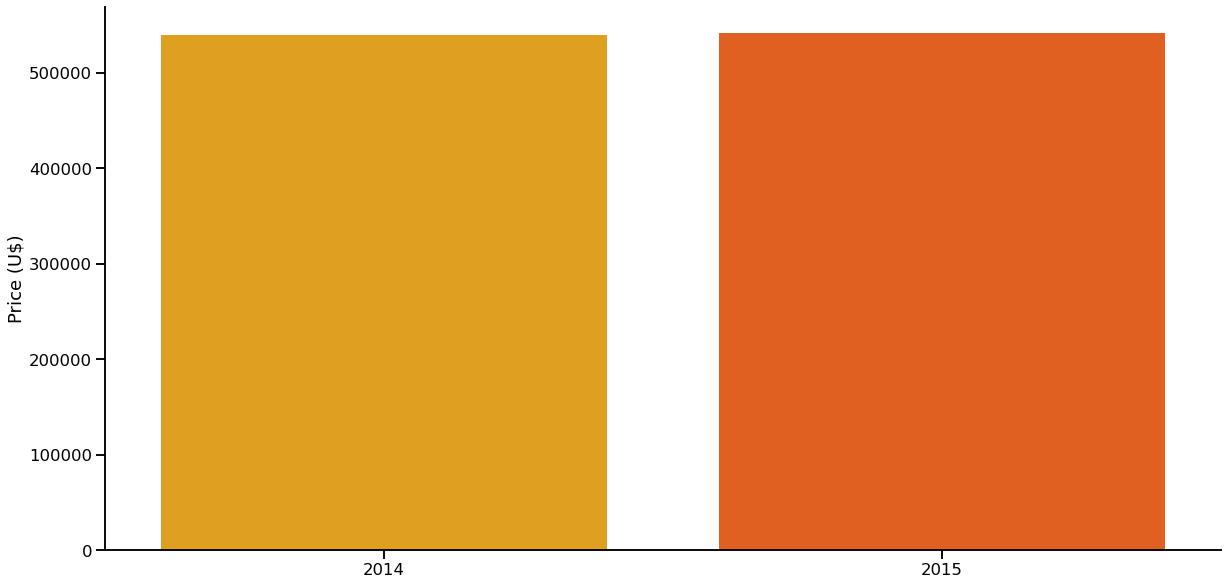

In [26]:
#h4: O crescimento do preço dos imóveis YoY é de 10%. 

df_h4 = df.copy()
df_h4['Year'] = df_h4['date'].dt.strftime('%Y')
df_h4 = df_h4[['Year', 'price']].groupby('Year').mean().reset_index()
df_h4['pct'] = df_h4['price'].pct_change()*100

result = ''
if df_h4.loc[1, 'pct'] > 10:
    result = 'verdadeira'
else: result = 'falsa'

print('A hipótese é {:}. A variação ano após ano dos imóveis é de apenas {:.2f}%.'.format(result, df_h4.loc[1,'pct']))

#plot
sn.set_context("talk")
h4 = sn.barplot(data=df_h4, x='Year', y='price', palette = 'autumn_r');
h4.set(ylabel = 'Price (U$)',
      xlabel= '');
sn.despine();

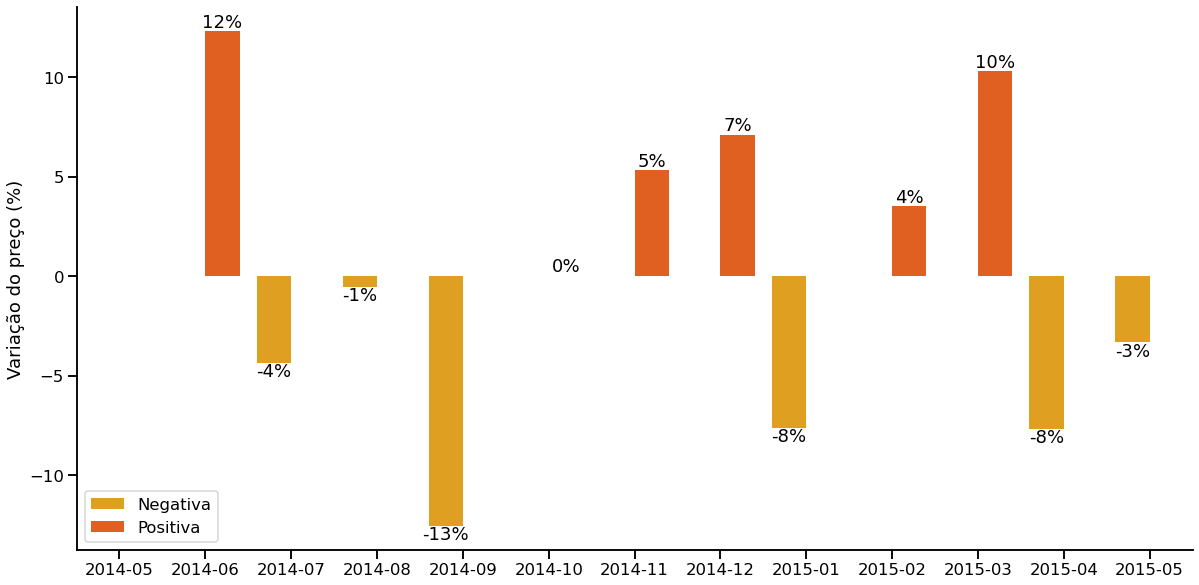

In [25]:
#h5: Imóveis com 3 banheiros tem um crescimento de MoM de 15%. 

df_h5 = df.loc[df['bathrooms'] == 3].copy()
df_h5['mês'] = df_h5['date'].dt.strftime('%Y-%m')
df_h5['Year'] = df_h5['date'].dt.strftime('%Y')

df_h5 = df_h5[['mês', 'price']].groupby('mês').mean().reset_index()
df_h5['pct'] = df_h5['price'].pct_change()*100
df_h5['pct_variacao'] = df_h5['pct'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')

#plot
sn.set_context("talk")
h5 = sn.barplot(data=df_h5, x='mês', y='pct', hue= 'pct_variacao', palette = 'autumn_r');
h5.set(ylabel = 'Variação do preço (%)',
      xlabel= '');
sn.despine();
for container in h5.containers:
    h5.bar_label(container, fmt= '%.f%%')
h5.get_legend().set_title(None)

A hipótese é verdadeira. Imóveis com 2 ou mais andares são 29.46% mais caros que os demais, em média.


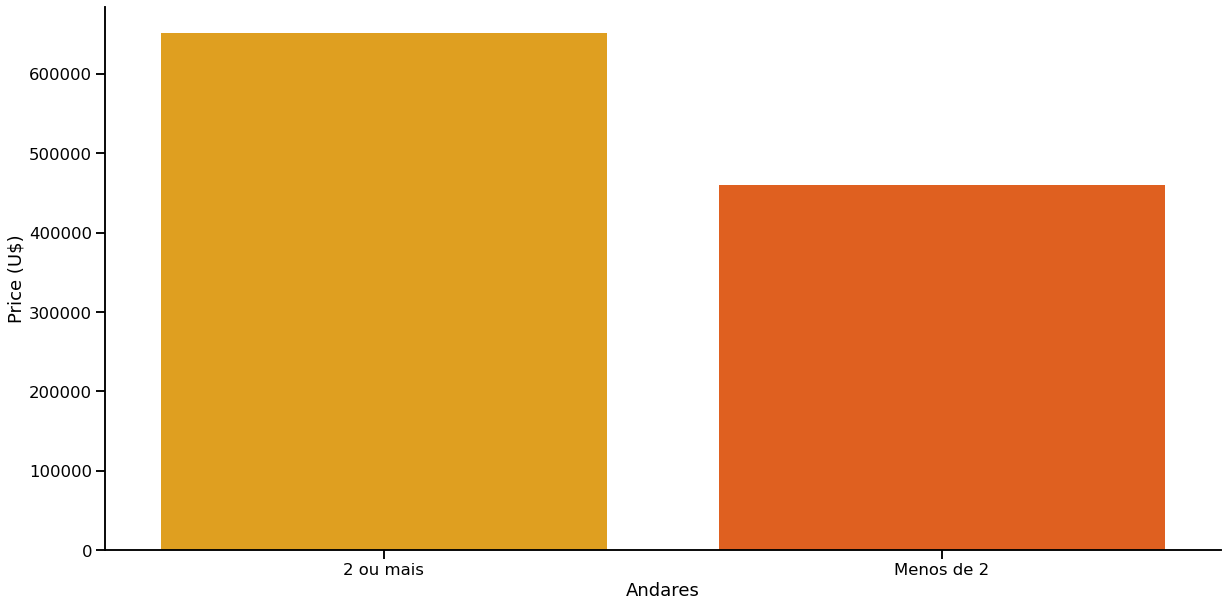

In [147]:
#h6: Imóveis com 2 ou mais andares são 25% mais caros que a média. 

df['price_floors'] = df['floors'].apply(lambda x: "2 ou mais" if x >= 2 else "Menos de 2")
df_h6 = df[['price_floors', 'price']].groupby('price_floors').mean().reset_index()
df_h6['pct'] = df_h6['price'].pct_change()*-100

result = ''
if df_h6.loc[1, 'pct'] > 25:
    result = 'verdadeira'
else: result = 'falsa'

print('A hipótese é {:}. Imóveis com 2 ou mais andares são {:.2f}% mais caros que os demais, em média.'
      .format(result, df_h6.loc[1,'pct']))

#plot
sn.set_context("talk")
h6 = sn.barplot(data=df_h6, x='price_floors', y='price', palette = 'autumn_r');
h6.set(ylabel = 'Price (U$)',
      xlabel= 'Andares');
sn.despine();

A hipótese é verdadeira. Imóveis reformados são 43.37% mais caros que os demais, em média.


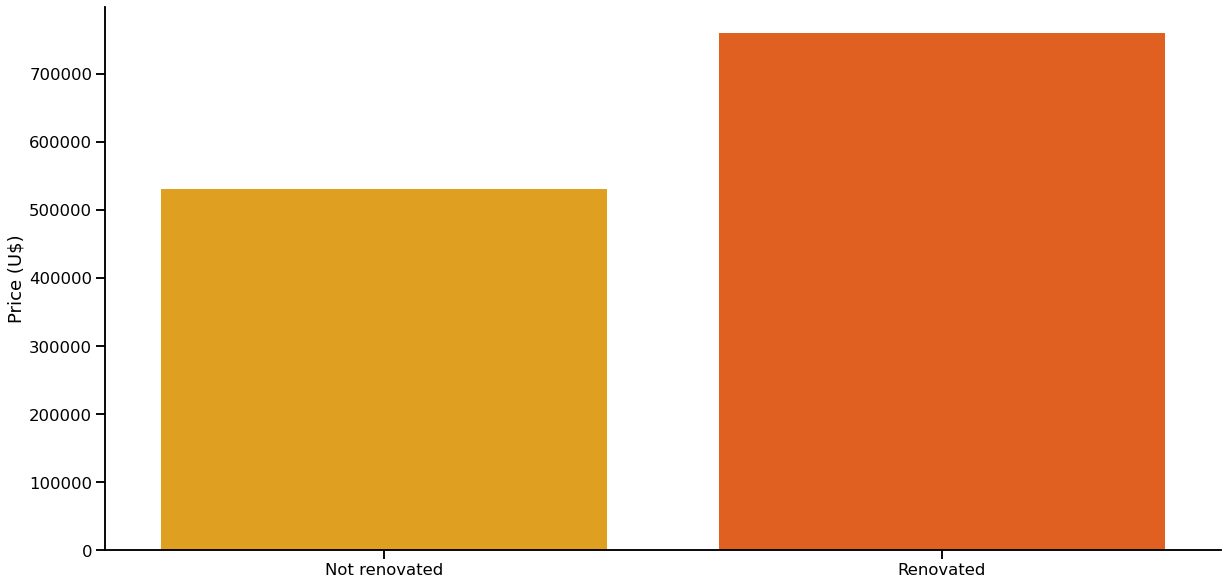

In [23]:
#h7: Imóveis reformados são 40% mais caros que a média. 

df_h7 = df.copy()
df_h7['renovation'] = df_h7['yr_renovated'].apply(lambda x: 'Renovated' if x > 0
                                                 else 'Not renovated')
df_h7 = df_h7[['renovation', 'price']].groupby('renovation').mean().reset_index()
df_h7['pct'] = df_h7['price'].pct_change()*100

result = ''
if df_h7.loc[1, 'pct'] > 40:
    result = 'verdadeira'
else: 
    result = 'falsa'

print('A hipótese é {:}. Imóveis reformados são {:.2f}% mais caros que os demais, em média.'
      .format(result, df_h7.loc[1,'pct']))

#plot
sn.set_context("talk")
h7 = sn.barplot(data=df_h7, x='renovation', y='price', palette = 'autumn_r');
h7.set(ylabel = 'Price (U$)',
      xlabel= '');
sn.despine();

A hipótese é verdadeira. Imóveis que possuem 2 banheiros ou menos são 124.68% mais baratos que os demais, em média.


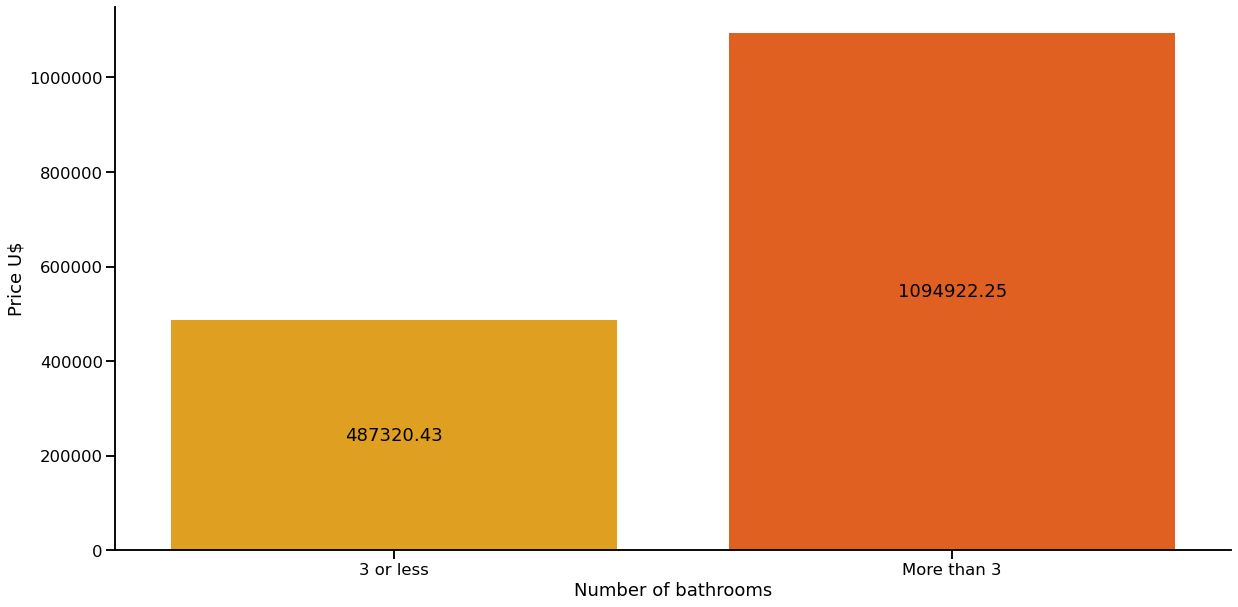

In [11]:
#h8: Imóveis que possuem três banheiros ou menos são 30% mais baratos que os demais. 

df_h8 = df.copy()
df_h8['p_bathrooms'] = df_h8['bathrooms'].apply(lambda x: '3 or less' if x <= 3 else 'More than 3')

df_h8 = df_h8[['p_bathrooms', 'price']].groupby('p_bathrooms').mean().reset_index()
df_h8['pct'] = df_h8['price'].pct_change()*100

result = ''
if df_h8.loc[1, 'pct'] > 15:
    result = 'verdadeira'
else: 
    result = 'falsa'

print('A hipótese é {:}. Imóveis que possuem 2 banheiros ou menos são {:.2f}% mais baratos que os demais, em média.'
      .format(result, df_h8.loc[1,'pct']))

#plot
sn.set_context("talk")
h8 = sn.barplot(data=df_h8, x='p_bathrooms', y='price', palette = 'autumn_r');
h8.set(ylabel = 'Price U$',
      xlabel= 'Number of bathrooms');
plt.ticklabel_format(style='plain', axis='y')
sn.despine();

for container in h8.containers:
    h8.bar_label(container, fmt= '%.2f', label_type='center')

A hipótese é verdadeira. Imóveis com nível elevado de design e construção (i.e. entre 11 e 13) são 227.21% mais caros que os demais, em média.


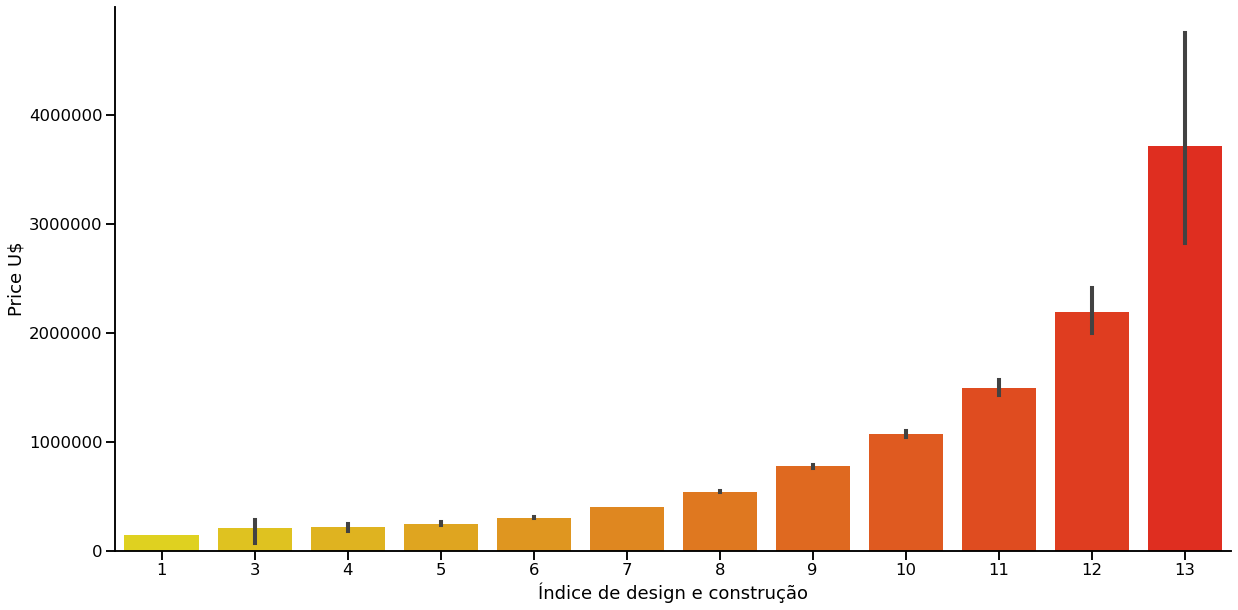

In [149]:
#h9: Imóveis que possuem elevado índice de design e construção são, em média, 30% mais caros que os demais. 

df_h9 = df.copy()
df_h9['design_level'] = df['grade'].apply(lambda x: 'High' if x > 10 else 
                                         'Average or low')

df_h9 = df_h9[['design_level', 'price']].groupby('design_level').mean().reset_index()
df_h9['pct'] = df_h9['price'].pct_change()*100

result = ''
if df_h9.loc[1, 'pct'] > 30:
    result = 'verdadeira'
else: 
    result = 'falsa'

print('A hipótese é {:}. Imóveis com nível elevado de design e construção (i.e. entre 11 e 13) são {:.2f}% mais caros que os demais, em média.'
      .format(result, df_h9.loc[1,'pct']))

#plot
sn.set_context("talk");
h9 = sn.barplot(data=df, x='grade', y='price', palette = 'autumn_r');
h9.set(ylabel = 'Price U$',
      xlabel= 'Índice de design e construção');
plt.ticklabel_format(style='plain', axis='y')
sn.despine();

A hipótese é verdadeira. Imóveis com vista excelente (i.e. igual a 4) são 64.05% mais caros que os demais, em média.


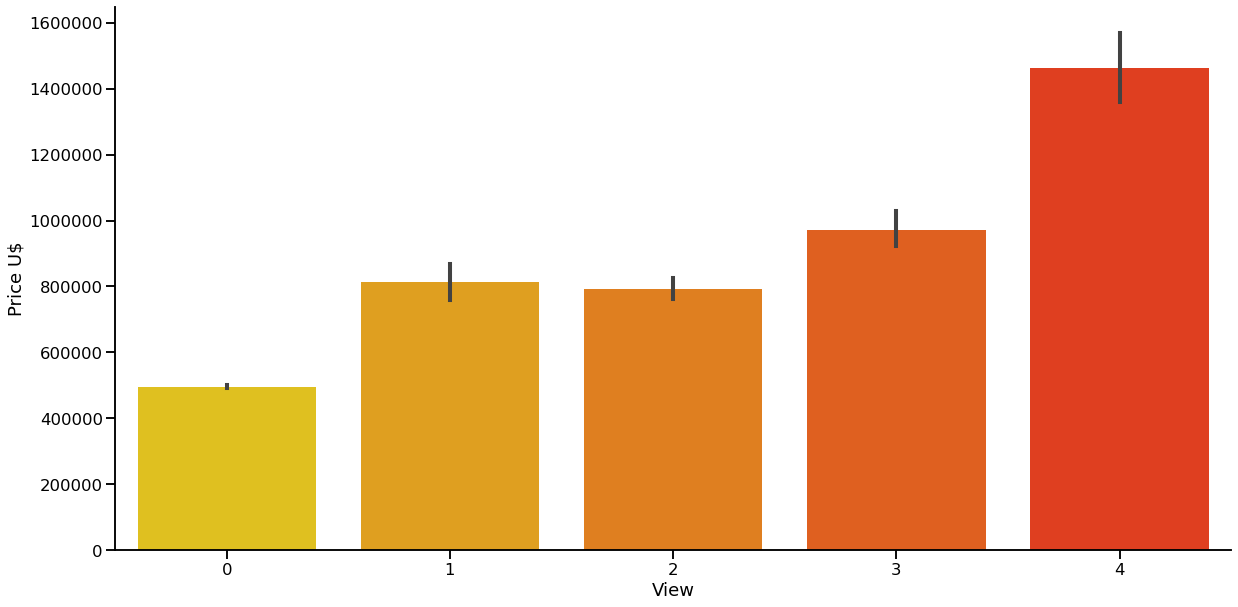

In [150]:
#h10: Imóveis com uma vista excelente são, em média, 40% mais caros que os demais.

df_h10 = df.copy()
df_h10['e_view'] = df_h10['view'].apply(lambda x: 'Excelent' if x == 4 else 
                                         'Good to low')

df_h10 = df_h10[['e_view', 'price']].groupby('e_view').mean().reset_index()
df_h10['pct'] = df_h10['price'].pct_change()*-100

result = ''
if df_h10.loc[1, 'pct'] > 50:
    result = 'verdadeira'
else: 
    result = 'falsa'

print('A hipótese é {:}. Imóveis com vista excelente (i.e. igual a 4) são {:.2f}% mais caros que os demais, em média.'
      .format(result, df_h10.loc[1,'pct']))

#plot
sn.set_context("talk");
h10 = sn.barplot(data=df, x='view', y='price', palette= 'autumn_r');
h10.set(ylabel = 'Price U$',
      xlabel= 'View');
plt.ticklabel_format(style='plain', axis='y')
sn.despine();

## Questões de negócio

### Quais são os negócios que a House Rocket deveria comprar e por qual preço

#### Construção dos atributos e planilha final

In [71]:
df_q1 = df.copy()

#definindo o valor mediano por zipcode -> valor regional 
regional_price = df_q1[['price', 'zipcode']].groupby('zipcode').median().reset_index()
regional_price.columns = ['zipcode', 'regional_price']

#agregando os resultados na planilha
df_q1_regional_price = pd.merge(df_q1, regional_price, how='inner', on='zipcode')

#criando coluna que receberá o status do imóvel -> recomendado ou não recomendado
for i in range(len(df_q1_regional_price)):
    if ((df_q1_regional_price.loc[i, 'price'] < df_q1_regional_price.loc[i, 'regional_price']) 
        & (df_q1_regional_price.loc[i, 'condition'] >= 3)):
        df_q1_regional_price.loc[i, 'Status'] = 'Recommended'
        
    else:
        df_q1_regional_price.loc[i, 'Status'] = 'Not recommended'

#salvando tabela final 
df_q1_final = df_q1_regional_price.iloc[:, [0,1,2,18,13,14,15,16,17,19]]
df_q1_final.to_csv('houses_to_buy.csv')

### Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço? 

#### Construção dos atributos e planilha final

In [72]:
#filtrando os dados a partir dos insights
df_q2 = df_q1_regional_price.loc[(df_q1_regional_price['Status'] == 'Recommended') &
                                 (df_q1_regional_price['condition'] == 5) &
                                 (df_q1_regional_price['waterfront'] == 0) & 
                                 (df_q1_regional_price['bathrooms'] <= 3) &
                                 (df_q1_regional_price['yr_renovated'] == 0) &
                                 (df_q1_regional_price['floors'] < 2) &
                                 (df_q1_regional_price['grade'] < 11) &
                                 (df_q1_regional_price['view'] < 4)].copy()

#criação de novos atributos 
df_q2['month'] = df_q2['date'].dt.month
df_q2['season'] = df_q2['month'].apply(lambda x: "Summer" if (x >= 6) & (x <=8) else
                                                 "Fall"   if (x >= 9) & (x <=11) else
                                                 "Winter" if (x == 1) | (x == 2) | (x == 12) else
                                                 "Spring")

#obtendo a mediana do preço por zipcode e estação do ano 
seasonal_price = df_q2[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
seasonal_price.columns = ['zipcode', 'season', 'seasonal_price']

#agregando os resultados na planilha
df_q2_seasonal_price = pd.merge(df_q2, seasonal_price, how='inner', on=['zipcode', 'season'])

#definindo as condições do preço de revenda 
for i in range(len(df_q2_seasonal_price)):
    if (df_q2_seasonal_price.loc[i, 'price'] > df_q2_seasonal_price.loc[i, 'seasonal_price']):
        df_q2_seasonal_price.loc[i, 'selling_Price'] = df_q2_seasonal_price.loc[i, 'price']*1.1
        
    else:
        df_q2_seasonal_price.loc[i, 'selling_Price'] = df_q2_seasonal_price.loc[i, 'price']*1.3

#calculando o lucro
df_q2_seasonal_price['revenue'] = 'NA'
for i in range(len(df_q2_seasonal_price)):
    df_q2_seasonal_price.loc[i, 'revenue'] = df_q2_seasonal_price.loc[i, 'selling_Price'] - df_q2_seasonal_price.loc[i, 'price']



   season  revenue
0    Fall 78969.64
1  Spring 84574.78
2  Summer 83123.59
3  Winter 77570.78


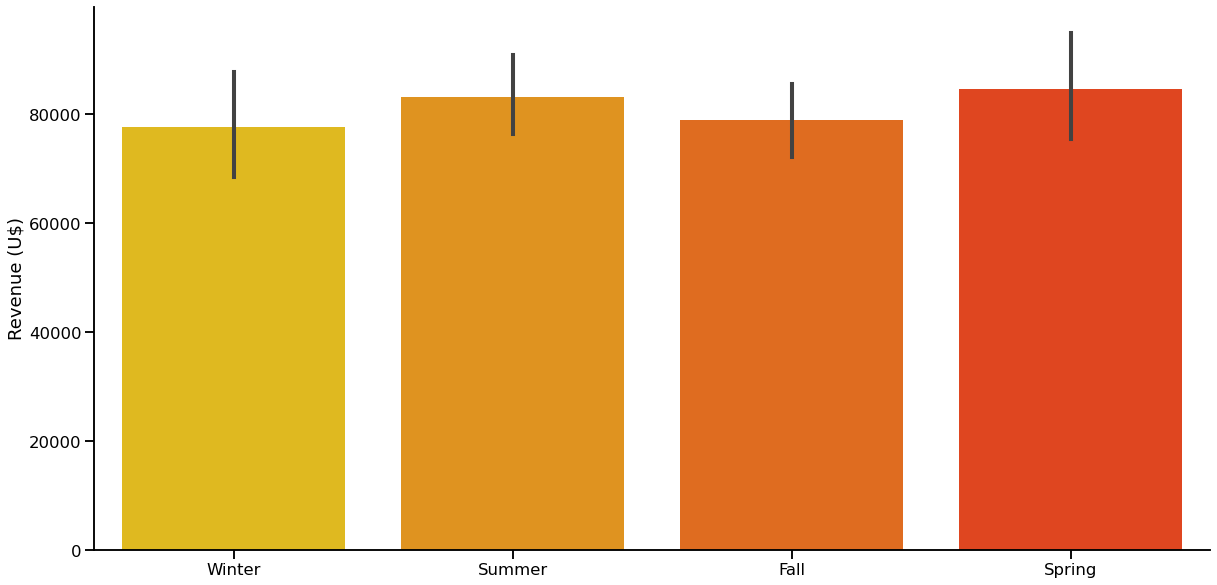

In [85]:
#observando o lucro médio por estação do ano
print(df_q2_seasonal_price[['season', 'revenue']].groupby('season').mean().reset_index())

#plot
sn.set_context("talk")
h0 = sn.barplot(data=df_q2_seasonal_price, x='season', y='revenue', palette = 'autumn_r');
h0.set(ylabel = 'Revenue (U$)',
      xlabel= '');
sn.despine();

In [86]:
#reorganizando e salvando a tabela final
df_q2_seasonal_price = df_q2_seasonal_price.drop(columns=['month'])
df_q2_seasonal_price = df_q2_seasonal_price.loc[:, ['id',
                                                    'date',
                                                    'yr_built',
                                                    'yr_renovated',
                                                    'zipcode',
                                                    'lat',
                                                    'long',
                                                    'Status',
                                                    'season',
                                                    'regional_price',
                                                    'seasonal_price',
                                                    'price',
                                                    'selling_Price',
                                                    'revenue']]
df_q2_seasonal_price.to_csv('house_selling_values.csv')